## K Means


### 1) Get the dataset

In [31]:
#Supress warnings
import warnings
warnings.filterwarnings('ignore')

# Importing the libraries
import numpy as np
import pandas as pd

np.set_printoptions(precision=3)
np.set_printoptions(suppress=True) #Otherwise prints in scientific format

%matplotlib inline 
#Needed to inline graphs
import matplotlib.pyplot as plt


# Importing the dataset
dataset = pd.read_csv('Mall_Customers.csv')

### Probelm

A mall company wants to **group** its customers based on **Annual income** and **Spending score**

In [32]:
print("No. of datapoints : ", len(dataset))
dataset[:10]

No. of datapoints :  200


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


### 2) Getting the variables into a numpy array

Notice we do not have any dependent variables here. This classification is based on unlabelled data and hence this kind of learning is called **unsupervised learning** 

In [33]:
X = dataset.iloc[:,[3,4]].values 

### 3) Finding the optimal number of clusters

In [34]:
from sklearn.cluster import KMeans
help(KMeans)

Help on class KMeans in module sklearn.cluster.k_means_:

class KMeans(sklearn.base.BaseEstimator, sklearn.base.ClusterMixin, sklearn.base.TransformerMixin)
 |  K-Means clustering
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, optional, default: 8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random' or an ndarray}
 |      Method for initialization, defaults to 'k-means++':
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose k observations (rows) at random from data for
 |      the initial centroids.
 |  
 |      If an ndarray is passed, it should be of shape (n_clusters, n_features)
 |      and gives the initial centers.
 |  
 |  n_init : int, default: 10
 |      Number of time t

In [35]:
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

#### Compute WCSS

In [36]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

#### Plot the Num clusters vs WCSS 

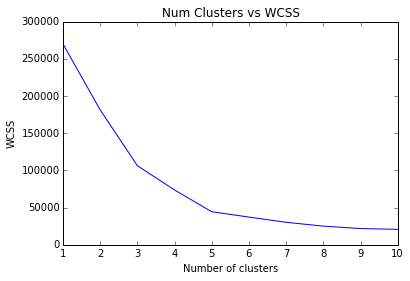

In [37]:
plt.plot(range(1,11),wcss)
plt.title("Num Clusters vs WCSS")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

**Optimal number of clusters : 5**

### 4) Get the category of each data point

In [38]:
kmeans = KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)
category = kmeans.fit_predict(X)
pd.DataFrame(np.hstack((X,category.reshape(-1,1))),columns=["Income","Spending Score","Category"])[:10]

,Income,Spending Score,Category
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4
5,17,76,3
6,18,6,4
7,18,94,3
8,19,3,4
9,19,72,3


### 5) Visualizing the cluster

Notice, this is not possible for higher dimensions

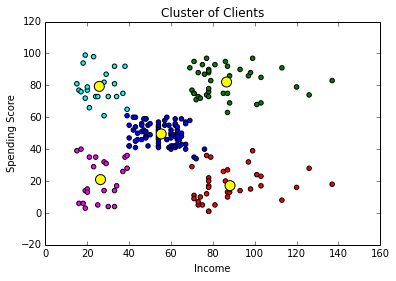

In [39]:
plt.scatter(X[category==0,0],X[category==0,1],c='red',label='cluster 1')
plt.scatter(X[category==1,0],X[category==1,1],c='blue',label='cluster 2')
plt.scatter(X[category==2,0],X[category==2,1],c='green',label='cluster 3')
plt.scatter(X[category==3,0],X[category==3,1],c='cyan',label='cluster 4')
plt.scatter(X[category==4,0],X[category==4,1],c='magenta',label='cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='yellow',label='Centroid')
plt.title("Cluster of Clients")
plt.xlabel("Income")
plt.ylabel("Spending Score")
plt.show()